# Exploraaaaaaaaaaation #

In [1]:
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

import json
from ast import literal_eval  # OP = OP, NP = P (by Articuno's Law)

%matplotlib inline

In [2]:
#datapath = 'data/'

## Loading Recipes ##

In [3]:
#filename = 'RAW_recipes.csv'

In [4]:
#df_recipes = pd.read_csv(datapath + filename, index_col='id')

In [5]:
#df_recipes['submitted'] = df_recipes['submitted'].astype('datetime64')

In [6]:
#for col in ['nutrition', 'tags', 'ingredients', 'steps']:
#    df_recipes[col] = df_recipes[col].apply(lambda x: literal_eval(x))

In [7]:
#df_recipes = df_recipes[df_recipes['minutes'] < 300]

## Loading Interactions ##

In [8]:
#filename = 'RAW_interactions.csv'

In [9]:
#df_inter = pd.read_csv(datapath + filename)

In [10]:
#df_inter['date'] = df_inter['date'].astype('datetime64')

## Avg rating, n votes and std ##

In [11]:
#data = [[i, df_sub.shape[0], df_sub.rating.mean(), df_sub.rating.std()] for i, df_sub in df_inter.groupby('recipe_id')]
#df_inter_recipe = pd.DataFrame(data, columns=['recipe_id', 'n_votes', 'avg_rating', 'std_rating'])

In [12]:
#df_inter_recipe = df_inter_recipe.set_index('recipe_id')

In [13]:
#df_inter_recipe

In [14]:
#df = df_recipes.join(df_inter_recipe)
#df.std_rating = df.std_rating.fillna(0)

In [15]:
#df

In [16]:
#df.describe()

In [17]:
#plot = sns.pairplot(df[['minutes', 'n_steps', 'n_ingredients', 'n_votes', 'avg_rating', 'std_rating']])
#plot.savefig('imgs/pairplot_recipes.png')

In [18]:
#with open('data/recipes.json', 'w') as f:
#    df.to_json(f, date_format='')

In [19]:
df = pd.read_json('data/recipes.json')

In [20]:
df.submitted = df.submitted.astype('datetime64')

## Tag Analysis ##

In [21]:
df['tags'].to_numpy()[:2]

array([list(['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']),
       list(['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment'])],
      dtype=object)

In [22]:
df.tags

137739    [60-minutes-or-less, time-to-make, course, mai...
31490     [30-minutes-or-less, time-to-make, course, mai...
112140    [time-to-make, course, preparation, main-dish,...
59389     [60-minutes-or-less, time-to-make, course, mai...
44061     [weeknight, time-to-make, course, main-ingredi...
                                ...                        
486161    [ham, 60-minutes-or-less, time-to-make, course...
493372    [15-minutes-or-less, time-to-make, course, pre...
308080    [60-minutes-or-less, time-to-make, course, mai...
298512    [30-minutes-or-less, time-to-make, course, pre...
298509    [30-minutes-or-less, time-to-make, course, pre...
Name: tags, Length: 221458, dtype: object

In [23]:
tags = [j for i in df.tags for j in i]

In [24]:
tags_dict = Counter(tags)

In [25]:
tags_dict.most_common(50)

[('preparation', 220941),
 ('time-to-make', 219535),
 ('course', 208669),
 ('main-ingredient', 162196),
 ('dietary', 157973),
 ('easy', 120706),
 ('occasion', 109072),
 ('cuisine', 87211),
 ('low-in-something', 81784),
 ('60-minutes-or-less', 69988),
 ('main-dish', 66589),
 ('equipment', 64183),
 ('number-of-servings', 57100),
 ('30-minutes-or-less', 55075),
 ('vegetables', 51938),
 ('meat', 50828),
 ('taste-mood', 49644),
 ('4-hours-or-less', 49489),
 ('north-american', 46083),
 ('15-minutes-or-less', 43933),
 ('3-steps-or-less', 43131),
 ('desserts', 42003),
 ('low-sodium', 41666),
 ('low-carb', 39659),
 ('healthy', 38588),
 ('dinner-party', 35992),
 ('low-cholesterol', 35225),
 ('vegetarian', 34663),
 ('low-calorie', 34597),
 ('beginner-cook', 34091),
 ('5-ingredients-or-less', 33986),
 ('holiday-event', 33154),
 ('low-protein', 31466),
 ('inexpensive', 31325),
 ('oven', 30315),
 ('fruit', 30268),
 ('low-saturated-fat', 29870),
 ('american', 29606),
 ('eggs-dairy', 29345),
 ('pasta-

In [26]:
tags_dict.get('north-american')  # Biased towards low quality food

46083

In [36]:
# We will create dummies for these tags. For some of them, we are interested in True values, for others, in False
# healthy and healthy-2 will be combined
custom_tags = ['vegetarian', 'healthy', 'healthy-2', 'oven', 'italian', 'beginner-cook', 'inexpensive', 'desserts', 'european']

In [37]:
df_tag = df.copy()[['submitted', 'tags', 'n_votes', 'avg_rating', 'std_rating']]

In [38]:
d_tags = df.tags.to_numpy()

for tag in custom_tags:
    dummy = np.array([tag in tags for i, tags in enumerate(d_tags)]).astype(int)
    df_tag[tag] = dummy

In [39]:
df_tag.healthy = df_tag.healthy.combine(df_tag['healthy-2'], func=max)
df_tag = df_tag.drop(columns='healthy-2')

In [40]:
df_tag = df_tag[(df_tag.oven == 0) & (df_tag.desserts == 0)]
df_tag = df_tag.drop(columns=['oven', 'desserts', 'tags'])

In [41]:
df_tag

,submitted,n_votes,avg_rating,std_rating,vegetarian,healthy,italian,beginner-cook,inexpensive,european
137739,2005-09-16,3,5.0,0.0,1,0,0,0,0,0
112140,2005-02-25,1,4.0,0.0,0,0,0,0,0,0
44061,2002-10-25,1,5.0,0.0,1,0,0,0,0,0
5289,1999-12-06,2,5.0,0.0,0,0,0,0,0,0
25274,2002-04-14,1,2.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
357451,2009-02-23,2,5.0,0.0,0,0,0,1,1,0
188810,2006-10-03,1,3.0,0.0,0,1,0,0,0,0
486161,2012-08-29,6,5.0,0.0,0,0,0,0,0,0
493372,2013-01-09,1,5.0,0.0,1,0,0,0,0,0


In [42]:
# Change dates to just represent the month
df_tag.submitted = df_tag.submitted.astype('datetime64[M]')

In [124]:
df_tag = df_tag[(df_tag['vegetarian']== 1)  | (df_tag['italian']== 1)  | (df_tag['healthy']== 1)  | (df_tag['beginner-cook'] == 1)  | (df_tag['inexpensive'] == 1)  | (df_tag['european']== 1)]

In [125]:
tags = ['vegetarian', 'italian',  'healthy', 'beginner-cook', 'inexpensive', 'european']

data = {tag: df_tag[df_tag[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data.items():
    data[k] = v.sort_index()

In [126]:
def sumseries(x, y):
    if np.isnan(x):
        return y
    elif np.isnan(y):
        return x
    else:
        return x+y

In [127]:
total = data['vegetarian']
for i, ele in enumerate(data):
    if i > 0:
        total = total.combine(data[ele], func=sumseries)

In [128]:
for tag, dic in data.items():
    data[tag] = pd.Series({k:v/total[k] for k, v in data[tag].items()})

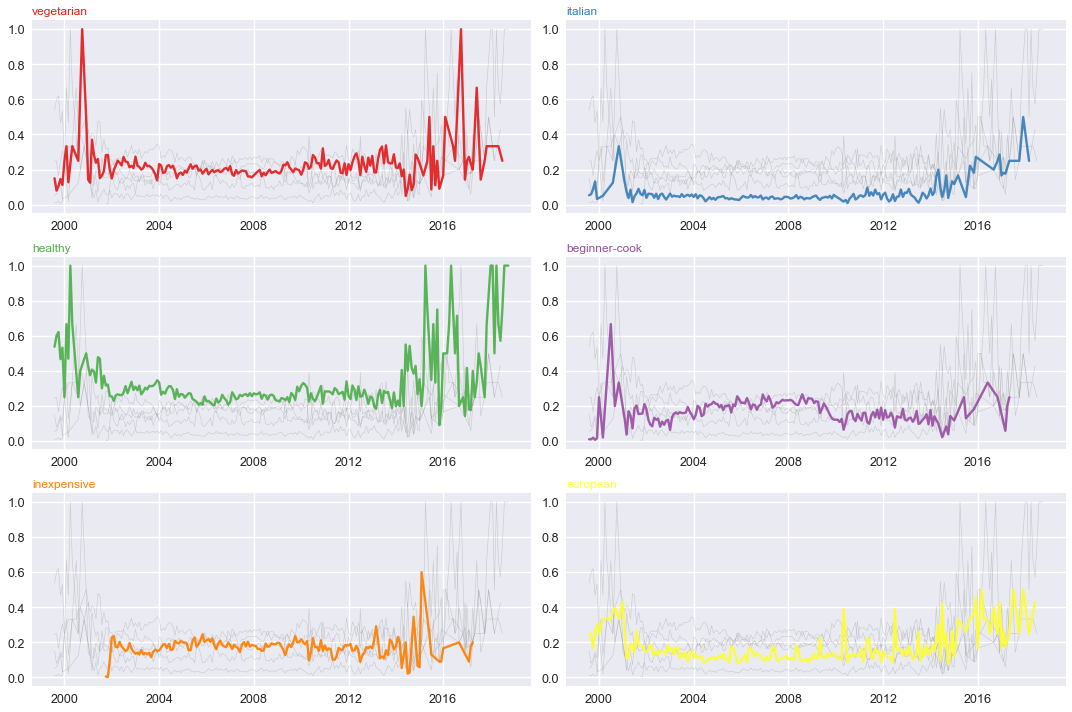

In [129]:
plt.style.use('seaborn-darkgrid')

palette = plt.get_cmap('Set1')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy(), marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy(), marker = '', color=palette(i), lw = 2.4, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color=palette(i))

fig.tight_layout()
#fig.savefig('imgs/tags.png')
plt.show()


In [102]:
plt.plot(df)

,submitted,n_votes,avg_rating,std_rating,vegetarian,healthy,italian,beginner-cook,inexpensive,european
137739,2005-09-01,3,5.0,0.0,1,0,0,0,0,0
112140,2005-02-01,1,4.0,0.0,0,0,0,0,0,0
44061,2002-10-01,1,5.0,0.0,1,0,0,0,0,0
5289,1999-12-01,2,5.0,0.0,0,0,0,0,0,0
25274,2002-04-01,1,2.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
357451,2009-02-01,2,5.0,0.0,0,0,0,1,1,0
188810,2006-10-01,1,3.0,0.0,0,1,0,0,0,0
486161,2012-08-01,6,5.0,0.0,0,0,0,0,0,0
493372,2013-01-01,1,5.0,0.0,1,0,0,0,0,0


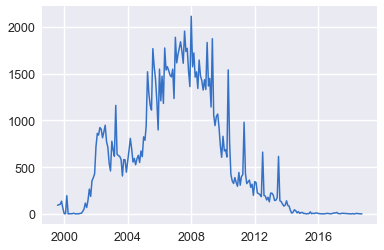